#### 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 보이스피싱 일자별 신고데이터 로드

In [5]:
voice_df = pd.read_csv('./data/voice_fishing_by_day.csv',index_col='접수완료일시_연월일')
voice_df


,접수완료일시
접수완료일시_연월일,
2020-01-02,29
2020-01-03,31
2020-01-04,6
2020-01-05,2
2020-01-06,14
...,...
2023-01-14,12
2023-01-15,9
2023-01-16,23


In [10]:
voice_df['Change'] = (voice_df['접수완료일시']/voice_df['접수완료일시'].shift(1))-1

In [11]:
voice_df


,접수완료일시,Change
접수완료일시_연월일,,
2020-01-02,29,NaN
2020-01-03,31,0.068966
2020-01-04,6,-0.806452
2020-01-05,2,-0.666667
2020-01-06,14,6.000000
...,...,...
2023-01-14,12,-0.714286
2023-01-15,9,-0.250000
2023-01-16,23,1.555556


In [21]:
voice_df['접수완료일시'].pct_change()

접수완료일시_연월일
2020-01-02         NaN
2020-01-03    0.068966
2020-01-04   -0.806452
2020-01-05   -0.666667
2020-01-06    6.000000
                ...   
2023-01-14   -0.714286
2023-01-15   -0.250000
2023-01-16    1.555556
2023-01-17    0.000000
2023-01-18   -0.434783
Name: 접수완료일시, Length: 1094, dtype: float64

<AxesSubplot:xlabel='접수완료일시_연월일'>

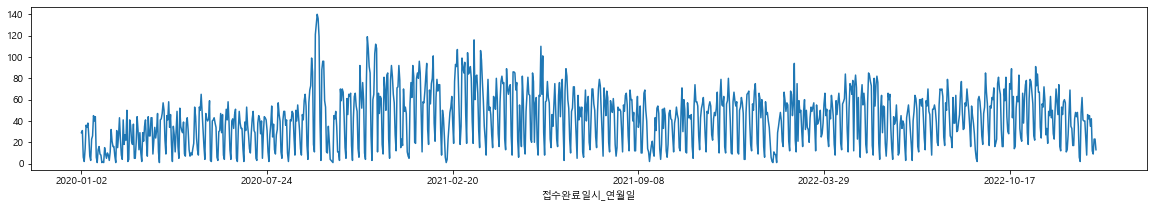

In [15]:
voice_df['접수완료일시'].plot(figsize=(20,3))

<AxesSubplot:xlabel='접수완료일시_연월일'>

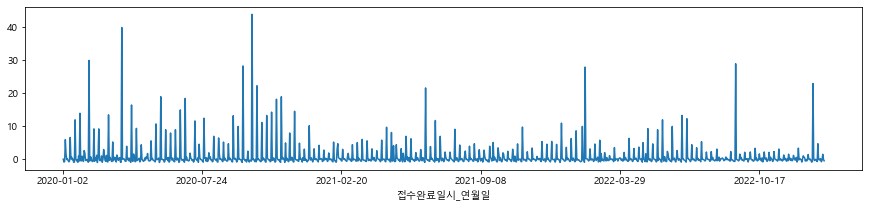

In [19]:
voice_df['Change'].plot(figsize=(15,3))

#### diff를 통한 증감구하기

In [24]:
voice_df['Diff'] = voice_df['접수완료일시'].diff()
voice_df

,접수완료일시,Change,Diff
접수완료일시_연월일,,,
2020-01-02,29,NaN,NaN
2020-01-03,31,0.068966,2.0
2020-01-04,6,-0.806452,-25.0
2020-01-05,2,-0.666667,-4.0
2020-01-06,14,6.000000,12.0
...,...,...,...
2023-01-14,12,-0.714286,-30.0
2023-01-15,9,-0.250000,-3.0
2023-01-16,23,1.555556,14.0


In [26]:
(voice_df['Change']+1).describe()

count    1093.000000
mean        1.913534
std         3.746714
min         0.040000
25%         0.586957
50%         0.920635
75%         1.339286
max        45.000000
Name: Change, dtype: float64

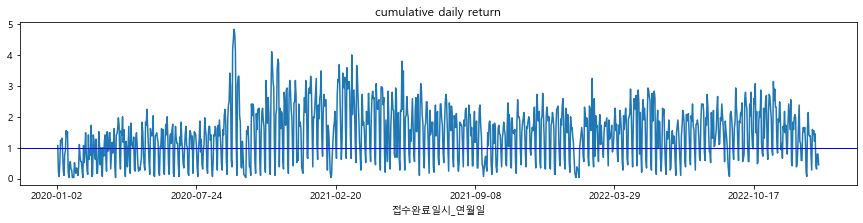

In [28]:
cum_daily_return = (voice_df['Change']+1).cumprod()
cum_daily_return.plot(figsize=(15,3), title='cumulative daily return')
plt.axhline(1, c='b', lw=1)

#### 이동평균, Rolling, Expanding

In [31]:
voice_df['SMA7'] = voice_df['접수완료일시'].rolling(window=7).mean()
voice_df['SMA14'] = voice_df['접수완료일시'].rolling(window=14).mean()

<AxesSubplot:xlabel='접수완료일시_연월일'>

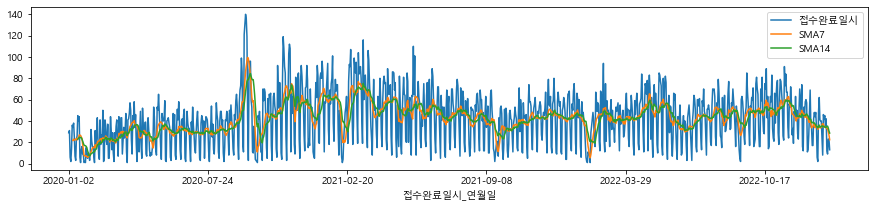

In [33]:
voice_df[['접수완료일시', 'SMA7', 'SMA14']].plot(figsize=(15, 3))


#### 누적이동평균(Cumulative moving average)

In [35]:
voice_df['CMA'] = voice_df['접수완료일시'].expanding(14).mean()

<AxesSubplot:xlabel='접수완료일시_연월일'>

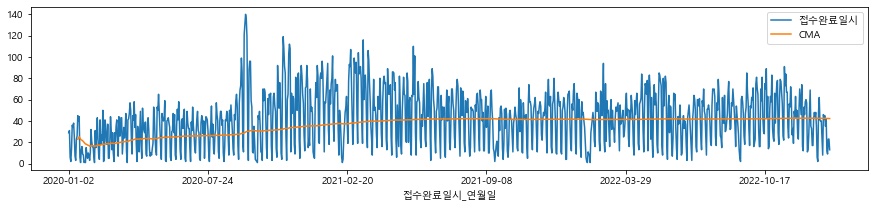

In [37]:
voice_df[['접수완료일시','CMA']].plot(figsize=(15,3))

#### 지수이동평균(Exponential Moving Average)
- 최근 자료에 가중치를 부여하여 최근 가격 변동을 잘 나타낸다.

In [40]:
#exponential weighted moving
#지수함수 x값이 적을수록 변화의 폭이 크고, x값이 커질수록 변화의 폭이 작아진다
#이런 지수함수의 원리를 이용하여 오래된 데이터(현재기준 오차가 커질수록)에 지수감쇠 적용.
voice_df['EWM_short'] = voice_df['접수완료일시'].ewm(span=12).mean()
voice_df['EWM_long'] = voice_df['접수완료일시'].ewm(span=120).mean()

<AxesSubplot:xlabel='접수완료일시_연월일'>

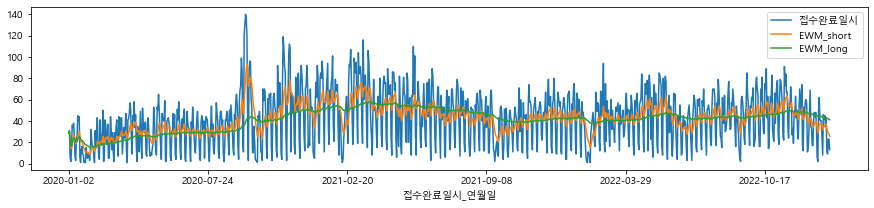

In [41]:
voice_df[['접수완료일시','EWM_short','EWM_long']].plot(figsize=(15,3))

<AxesSubplot:xlabel='접수완료일시_연월일'>

c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Users\pgho8\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


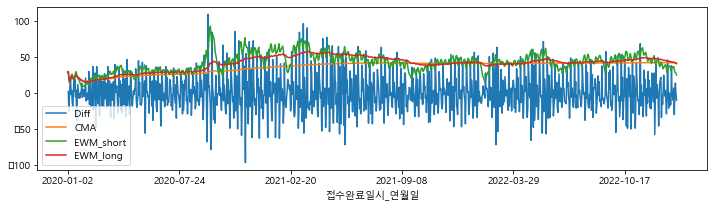

In [46]:
voice_df.iloc[:,[2,5,6,7]].plot(figsize=(12,3))

#### 샘플링
asfreq
- Convert TimeSeries to specified frequency.
- asfreq : 특정 주기 데이터를 반환
- resample : 특정 주기의 그룹화된 데이터를 반환

In [64]:
voice_df.index = pd.DatetimeIndex(voice_df.index)

In [66]:
voice_df['접수완료일시'].asfreq('D',method='bfill').head(10)

접수완료일시_연월일
2020-01-02    29
2020-01-03    31
2020-01-04     6
2020-01-05     2
2020-01-06    14
2020-01-07    36
2020-01-08    34
2020-01-09    38
2020-01-10    25
2020-01-11     7
Freq: D, Name: 접수완료일시, dtype: int64

In [67]:
voice_df['접수완료일시'].asfreq('D').interpolate()

접수완료일시_연월일
2020-01-02    29.0
2020-01-03    31.0
2020-01-04     6.0
2020-01-05     2.0
2020-01-06    14.0
              ... 
2023-01-14    12.0
2023-01-15     9.0
2023-01-16    23.0
2023-01-17    23.0
2023-01-18    13.0
Freq: D, Name: 접수완료일시, Length: 1113, dtype: float64

In [70]:
voice_df['접수완료일시'].asfreq(freq='4D').interpolate()

접수완료일시_연월일
2020-01-02    29.0
2020-01-06    14.0
2020-01-10    25.0
2020-01-14    26.0
2020-01-18     6.0
              ... 
2023-01-02    48.0
2023-01-06    40.0
2023-01-10    42.0
2023-01-14    12.0
2023-01-18    13.0
Freq: 4D, Name: 접수완료일시, Length: 279, dtype: float64

In [72]:
voice_df['접수완료일시'].asfreq(freq='M').interpolate()

접수완료일시_연월일
2020-01-31    10.0
2020-02-29     5.0
2020-03-31    42.0
2020-04-30    13.0
2020-05-31     3.0
2020-06-30    31.0
2020-07-31    37.0
2020-08-31    46.0
2020-09-30     4.0
2020-10-31    14.0
2020-11-30    30.5
2020-12-31    47.0
2021-01-31    21.0
2021-02-28    18.0
2021-03-31    50.0
2021-04-30    76.0
2021-05-31    58.0
2021-06-30    72.0
2021-07-31    29.0
2021-08-31    60.0
2021-09-30    54.0
2021-10-31    10.0
2021-11-30    48.0
2021-12-31    47.0
2022-01-31     2.0
2022-02-28    75.0
2022-03-31    45.0
2022-04-30    54.5
2022-05-31    64.0
2022-06-30    44.0
2022-07-31    17.0
2022-08-31    70.0
2022-09-30    71.0
2022-10-31    66.0
2022-11-30    63.0
2022-12-31     6.0
Freq: M, Name: 접수완료일시, dtype: float64

In [73]:
voice_df['접수완료일시'].asfreq(freq='Q').interpolate()

접수완료일시_연월일
2020-03-31    42
2020-06-30    31
2020-09-30     4
2020-12-31    47
2021-03-31    50
2021-06-30    72
2021-09-30    54
2021-12-31    47
2022-03-31    45
2022-06-30    44
2022-09-30    71
2022-12-31     6
Freq: Q-DEC, Name: 접수완료일시, dtype: int64

#### resample

In [75]:
voice_df['접수완료일시'].resample('D').mean()

접수완료일시_연월일
2020-01-02    29.0
2020-01-03    31.0
2020-01-04     6.0
2020-01-05     2.0
2020-01-06    14.0
              ... 
2023-01-14    12.0
2023-01-15     9.0
2023-01-16    23.0
2023-01-17    23.0
2023-01-18    13.0
Freq: D, Name: 접수완료일시, Length: 1113, dtype: float64

In [77]:
voice_df['접수완료일시'].resample('M').mean()

접수완료일시_연월일
2020-01-31    17.206897
2020-02-29    20.241379
2020-03-31    25.896552
2020-04-30    30.933333
2020-05-31    29.354839
2020-06-30    30.900000
2020-07-31    30.200000
2020-08-31    31.580645
2020-09-30    60.500000
2020-10-31    38.066667
2020-11-30    63.571429
2020-12-31    53.548387
2021-01-31    56.967742
2021-02-28    48.814815
2021-03-31    64.903226
2021-04-30    57.000000
2021-05-31    48.258065
2021-06-30    50.533333
2021-07-31    45.354839
2021-08-31    43.677419
2021-09-30    33.344828
2021-10-31    33.774194
2021-11-30    43.000000
2021-12-31    46.548387
2022-01-31    39.032258
2022-02-28    37.666667
2022-03-31    41.516129
2022-04-30    48.068966
2022-05-31    51.580645
2022-06-30    35.333333
2022-07-31    40.548387
2022-08-31    49.032258
2022-09-30    43.862069
2022-10-31    48.225806
2022-11-30    53.400000
2022-12-31    39.903226
2023-01-31    30.777778
Freq: M, Name: 접수완료일시, dtype: float64

<AxesSubplot:xlabel='접수완료일시_연월일'>

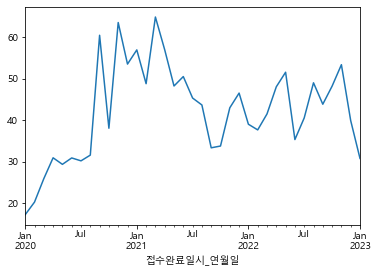

In [78]:
voice_df['접수완료일시'].resample('M').mean().plot()

In [79]:
voice_df['접수완료일시'].resample('Q').mean()

접수완료일시_연월일
2020-03-31    21.114943
2020-06-30    30.384615
2020-09-30    40.659341
2020-12-31    50.451220
2021-03-31    57.258427
2021-06-30    51.890110
2021-09-30    40.956044
2021-12-31    41.086957
2022-03-31    39.483146
2022-06-30    45.033333
2022-09-30    44.494505
2022-12-31    47.108696
2023-03-31    30.777778
Freq: Q-DEC, Name: 접수완료일시, dtype: float64